# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline


In [4]:
cust = pd.read_excel("marketing_campaign.csv.xlsx")

In [5]:
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-04-09 00:00:00,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-08-03 00:00:00,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-10-02 00:00:00,26.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0




```
# This is formatted as code
```

# Data Cleaning

In [6]:
cust.drop(["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Z_CostContact","Z_Revenue","Response"],axis = 1 , inplace = True)


In [7]:
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-04-09 00:00:00,58.0,635.0,...,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-08-03 00:00:00,38.0,11.0,...,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-10-02 00:00:00,26.0,11.0,...,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,...,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         2240 non-null   float64
 15  NumDealsPurchases    2240 non-null   f

In [9]:
cust.dropna(inplace = True)


In [10]:
cust["Dt_Customer"] = pd.to_datetime(cust["Dt_Customer"])
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   float64       
 1   Year_Birth           2216 non-null   float64       
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   float64       
 6   Teenhome             2216 non-null   float64       
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   float64       
 9   MntWines             2216 non-null   float64       
 10  MntFruits            2216 non-null   float64       
 11  MntMeatProducts      2216 non-null   float64       
 12  MntFishProducts      2216 non-null   float64       
 13  MntSweetProducts     2216 non-nul

In [11]:
cust["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
drop_raws_index =cust[(cust['Marital_Status'] == 'YOLO') | (cust['Marital_Status'] =='Absurd') | (cust['Marital_Status'] =='Alone')].index
drop_raws_index


Int64Index([131, 138, 153, 2093, 2134, 2177, 2202], dtype='int64')

In [13]:
cust.drop(drop_raws_index,inplace=True)
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-04-09,58.0,635.0,...,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-08-03,38.0,11.0,...,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-10-02,26.0,11.0,...,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0


In [14]:
cust["Education"].value_counts()

Graduation    1114
PhD            478
Master         363
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [15]:
cust=cust[(cust['Income'] < 200000) ]

In [16]:
cust.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,5589.875906,1968.801630,51965.706975,0.441576,0.505435,49.087862,305.328351,26.360507,167.228714,37.570199,27.086504,43.859601,2.318841,4.082428,2.671649,5.803895,5.318388,0.009511
std,3245.595371,11.982148,21543.449491,0.537014,0.544335,28.949411,337.706216,39.808291,224.464966,54.592527,41.118847,51.660767,1.923731,2.739481,2.925827,3.254782,2.424872,0.097081
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2823.250000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,1.750000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.500000,33.000000,233.250000,50.000000,33.250000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


# Feature Engineering

**age -> year_birth.**

**num_kids -> kidhome, teenhome.**

**cust_years -> Dt_Customer.**

**overall_spent -> MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds.**

**NumOfPerch -> "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"**

In [17]:
cust["Age"] = 2022 - cust["Year_Birth"] 
cust["num_kids"] = cust["Kidhome"] + cust["Teenhome"]
cust["cust_years"] = 2022 - cust["Dt_Customer"].dt.year
cust["total_spent"] = cust["MntWines"] + cust["MntFruits"] + cust["MntMeatProducts"] + cust["MntFishProducts"] + cust["MntSweetProducts"] +cust["MntGoldProds"]
cust["NumOfPerch"] = cust['NumDealsPurchases']+cust['NumWebPurchases']+ cust['NumCatalogPurchases']+ cust['NumStorePurchases']

cust.drop("Year_Birth", axis = 1 , inplace = True)
cust.drop("ID", axis = 1 , inplace = True)
cust.drop("Dt_Customer", axis = 1 , inplace = True)
cust.drop(["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"], axis = 1 , inplace = True)
cust.drop(['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],axis = 1 , inplace = True)

In [18]:
cust=cust[(cust['Age'] < 100) ]

# Preprocessing 

If you perform the encoding before the split, it will lead to data leakage (train-test contamination) In the sense, you will introduce new data (integers of Label Encoders) and use it for your models thus it will affect the end predictions results (good validation scores but poor in deployment).

After the train and validation data category already matched up, you can perform fit_transform on the train data, then only transform for the validation data - based on the encoding maps from train data.

In [19]:
cust.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Age,num_kids,cust_years,total_spent,NumOfPerch
0,Graduation,Single,58138.0,0.0,0.0,58.0,7.0,0.0,65.0,0.0,10,1617.0,25.0
1,Graduation,Single,46344.0,1.0,1.0,38.0,5.0,0.0,68.0,2.0,8,27.0,6.0
2,Graduation,Together,71613.0,0.0,0.0,26.0,4.0,0.0,57.0,0.0,9,776.0,21.0
3,Graduation,Together,26646.0,1.0,0.0,26.0,6.0,0.0,38.0,1.0,8,53.0,8.0
4,PhD,Married,58293.0,1.0,0.0,94.0,5.0,0.0,41.0,1.0,8,422.0,19.0


In [20]:
cat_cust = []
for col in cust.columns:
    if cust[col].dtype == object:
        cat_cust.append(col)


In [21]:
cust_encoding = pd.get_dummies(cust,cat_cust)
cols = cust_encoding.columns 


In [22]:
scaler = MinMaxScaler()
cust_scalled = pd.DataFrame(scaler.fit_transform(cust_encoding), columns = cols)


#  Modeling with kmeans

In [23]:
k = [2,3,4,5,6,7,8,9,10]
cust_sil = {}
cust_iner = {}
for i in k:  
    kmeans = KMeans(n_clusters = i,random_state=0)
    cust_trns =  kmeans.fit_transform(cust_scalled)
    cust_sil[i] = silhouette_score(cust_trns,kmeans.labels_)
    cust_iner[i] = kmeans.inertia_
    
cust_sil

{2: 0.7324893752816614,
 3: 0.6223303114543641,
 4: 0.5436108438942058,
 5: 0.5230581285707218,
 6: 0.5756682137504273,
 7: 0.5780890272905724,
 8: 0.5840615982944828,
 9: 0.5929954846458821,
 10: 0.6229461781464753}

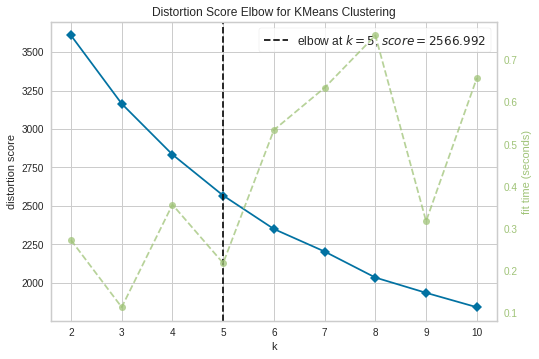

In [24]:
elb_visualizer = KElbowVisualizer(kmeans, k=(2,11))
elb_visualizer.fit(cust_scalled)    
elb_visualizer.show()  

**the Elbow  distripution here tills us that the most appropriat number of clusters is 5 clusters but i gess that i can use 4 or 6 also so lets see and make sure of what is the apropriate numberof clusters we can use.**

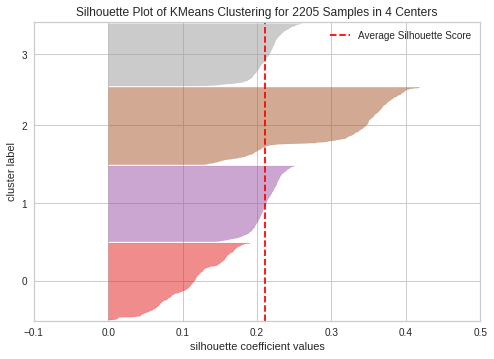

In [25]:
model = SilhouetteVisualizer(KMeans(4))
model.fit(cust_scalled)
model.show()

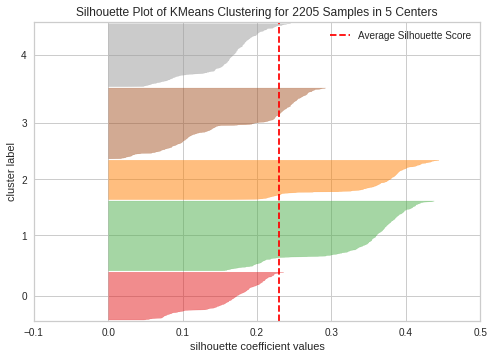

In [26]:
model = SilhouetteVisualizer(KMeans(5))
model.fit(cust_scalled)
model.show()

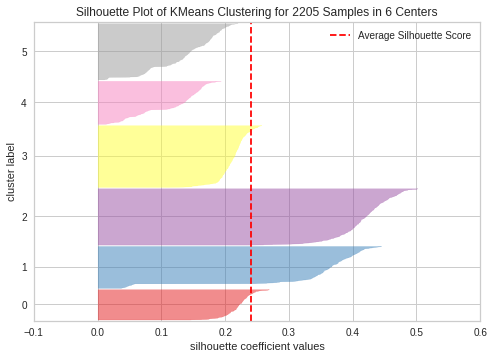

In [27]:
model = SilhouetteVisualizer(KMeans(6))
model.fit(cust_scalled)
model.show()

**Based on the Silhouette Plots apove we can chouse between 4 clusters or 5 clusters, I will chouse 5 and precede with this choice.**

In [28]:
kmeans.cluster_centers_
cust_trans = kmeans.transform(cust_scalled)
silhouette_score(cust_trans,kmeans.labels_)

0.6229461781472067

In [29]:
kmeans = KMeans(n_clusters =5,random_state=0)
km_pred = kmeans.fit_predict(cust_scalled)
cust_kmeans = cust.copy()
cust_kmeans["cluster_kmeans"] = km_pred

# **GaussianMixture algorithm**

In [30]:
gm = GaussianMixture(n_components = 5 , n_init = 10, random_state = 0)
gm.fit(cust_scalled)

GaussianMixture(n_components=5, n_init=10, random_state=0)

In [31]:
cust_gm = gm.predict(cust_scalled)


**this is the predection for 5 cluster the same as the kmean algorithm but lests see if this is the suitable number of clusters suitable for this algorithm lets check the BIC and AIC**

In [32]:
def BIC_AIC(df):
    bic = []
    aic = []
    for i in range(10):
        gm = GaussianMixture(n_components = i+1 , n_init = 10)
        gm.fit(cust_scalled)
        bic.append(gm.bic(df))
        aic.append(gm.aic(df))
    return bic , aic

In [33]:
def plot_BIC_AIC(bic,aic):
    k = [(i+1) for i in range(10)]
    plt.figure()
    plt.plot( k,bic )
    plt.xlabel("k")
    plt.ylabel("information cretertion")
    plt.xticks(k)
    plt.title("AIC and BIC for diffrent numbers of clusters k")
    plt.plot(k,aic )
    plt.show()


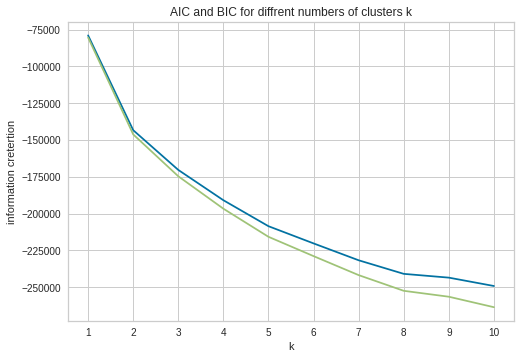

In [34]:
bic , aic = BIC_AIC(cust_scalled)
plot_BIC_AIC(bic , aic)
    

**As we can see here 3 is the suitable number of clusters in this algorithm**

In [35]:
gm = GaussianMixture(n_components = 3 , n_init = 10, random_state = 0)
gm.fit(cust_scalled)

GaussianMixture(n_components=3, n_init=10, random_state=0)

In [36]:
gm_pred = gm.predict(cust_scalled)
cust_gm = cust.copy()
cust_gm["cluster_gm"] = gm_pred
cust_gm.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Age,num_kids,cust_years,total_spent,NumOfPerch,cluster_gm
0,Graduation,Single,58138.0,0.0,0.0,58.0,7.0,0.0,65.0,0.0,10,1617.0,25.0,1
1,Graduation,Single,46344.0,1.0,1.0,38.0,5.0,0.0,68.0,2.0,8,27.0,6.0,1
2,Graduation,Together,71613.0,0.0,0.0,26.0,4.0,0.0,57.0,0.0,9,776.0,21.0,1
3,Graduation,Together,26646.0,1.0,0.0,26.0,6.0,0.0,38.0,1.0,8,53.0,8.0,1
4,PhD,Married,58293.0,1.0,0.0,94.0,5.0,0.0,41.0,1.0,8,422.0,19.0,2
